In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mxnet import image as mximg
%matplotlib inline

ImportError: No module named mxnet

# Data Number

In [39]:
data_dir = "D:\dog_data\dogbreed"
train_dir = "train"
test_dir = "test"

In [40]:
#获得所有训练样本和测试样本数量
train_num = len([name for name in os.listdir(os.path.join(data_dir, train_dir)) \
    if os.path.isfile(os.path.join(data_dir, train_dir, name))])
test_num = len([name for name in os.listdir(os.path.join(data_dir, test_dir)) \
    if os.path.isfile(os.path.join(data_dir, test_dir, name))])

print ("Training  Data Number: %d" % train_num)
print ("Testing   Data Number: %d" % test_num)

Training  Data Number: 10222
Testing   Data Number: 10357


# Training Data DIstribution

In [41]:
#获取要分类的种类数量
labels = pd.read_csv("D:\dog_data\dogbreed\labels.csv")
print ("Class Number: %d" % len(set(labels.breed)))

Class Number: 120


In [42]:
#这里会降序，列举出最多出现的类别次序，   训练集出现最多的种类是scottish_deerhound     head会展示返回序列的前面几个次序的数
class_freq = labels.breed.value_counts()
class_freq.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

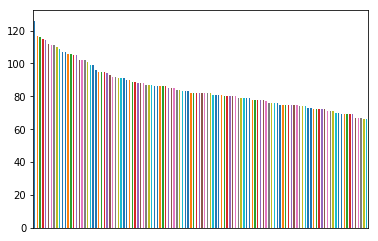

In [43]:
#把所有   csv文件中的图片id统计数都给画出来，下面应该是120条色线，可以看出最少的种类样本数量为60多
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected   将参数应用到  最重要和其他的位次。
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
class_freq.plot(kind='bar')

# Show Data

Image shape:  (375, 500, 3)
Image type :  samoyed


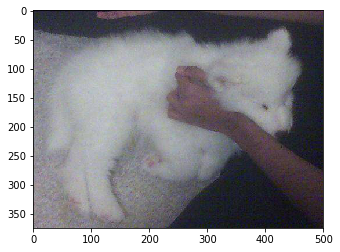

In [44]:
#通过csv文件随机找到图片对应的id值，   根据这个id值读取图片
rand_idx = np.random.randint(len(labels))

img_id = labels.iloc[rand_idx].id
#mxing会根据组合的图片名找到这个图片
img_class = labels.iloc[rand_idx].breed
img = mximg.imread(os.path.join(data_dir, train_dir, img_id+".jpg"))
#根据随机找到的图片进行打印输出   打印出图片的尺寸和色道。  并对图片进行展示
print ("Image shape: ", img.shape)
print ("Image type : ", img_class)
#print (img[:2,:2, 0])
plt.imshow(img.asnumpy())

# Tips

- Images have different size.